In [ ]:
# Code by Jash
# github - ijaya19
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [ ]:
# Load the dataset
file_path = "diabetes_dataset.csv" # File path to the datasets
df = pd.read_csv(file_path)

In [5]:
# Handle missing values
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=[object]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Display basic statistics
print(df.describe())

                 id        chol    stab.glu         hdl       ratio  \
count    403.000000  403.000000  403.000000  403.000000  403.000000   
mean   15978.310174  207.836228  106.672457   50.434243    4.520844   
std    11881.122124   44.390656   53.076655   17.242563    1.725810   
min     1000.000000   78.000000   48.000000   12.000000    1.500000   
25%     4792.500000  179.000000   81.000000   38.000000    3.200000   
50%    15766.000000  204.000000   89.000000   46.000000    4.200000   
75%    20336.000000  230.000000  106.000000   59.000000    5.400000   
max    41756.000000  443.000000  385.000000  120.000000   19.299999   

            glyhb         age      height      weight       bp.1s       bp.1d  \
count  403.000000  403.000000  403.000000  403.000000  403.000000  403.000000   
mean     5.565757   46.851117   66.019851  177.579404  136.893300   83.305211   
std      2.211519   16.312333    3.894070   40.291258   22.599389   13.505247   
min      2.700000   19.000000   52.0

C:\Users\j6375\AppData\Local\Temp\ipykernel_15220\2071419947.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


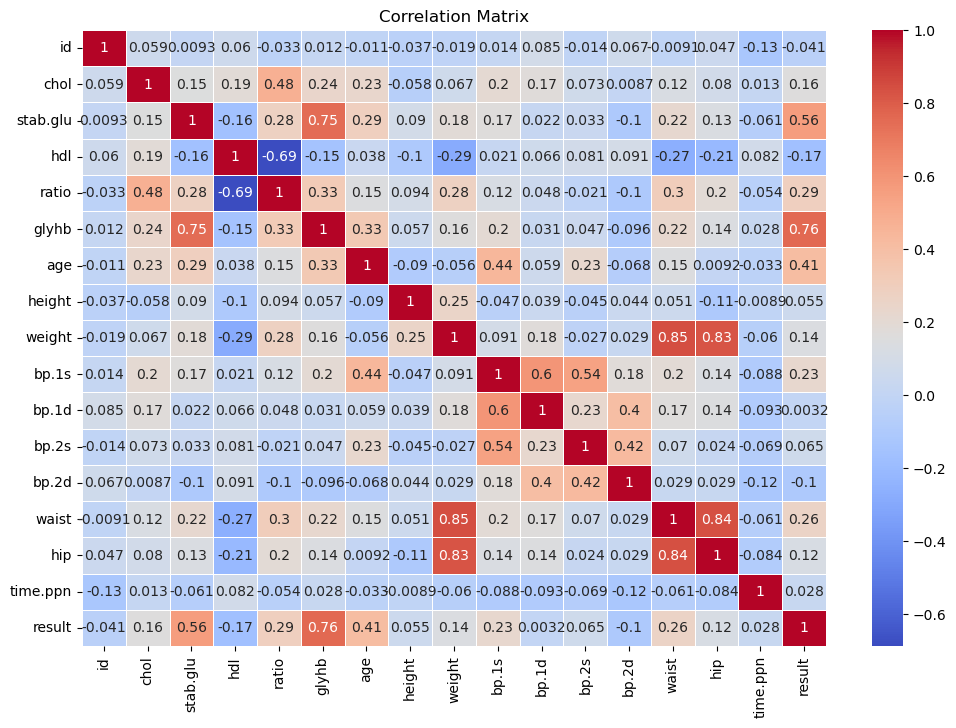

In [9]:
# Display correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

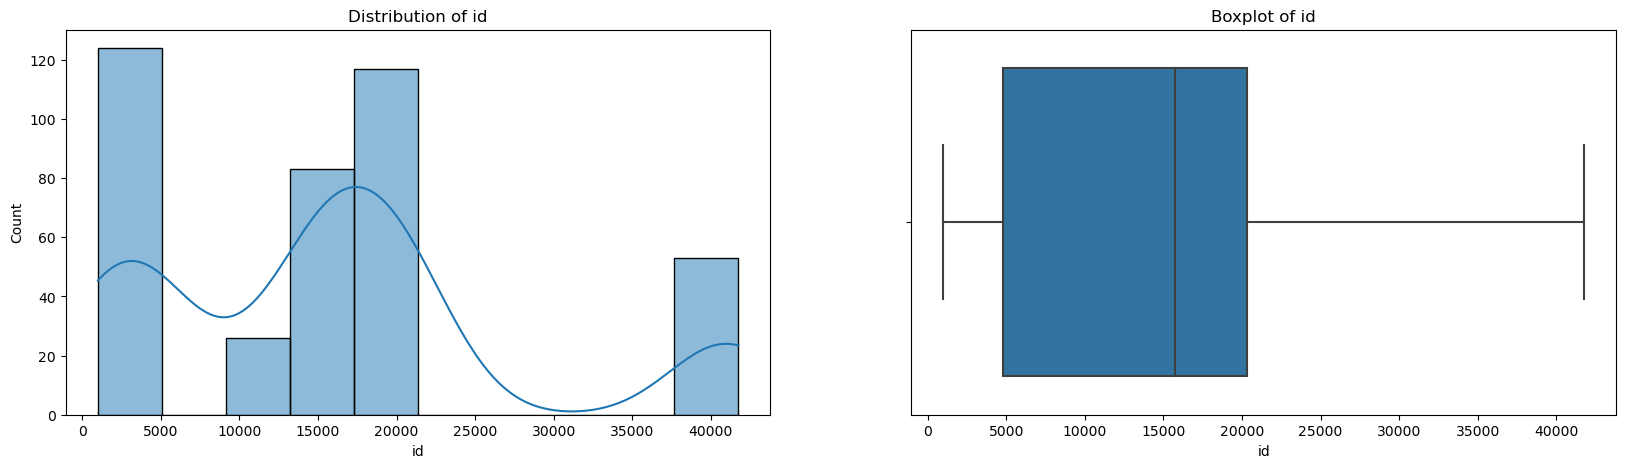

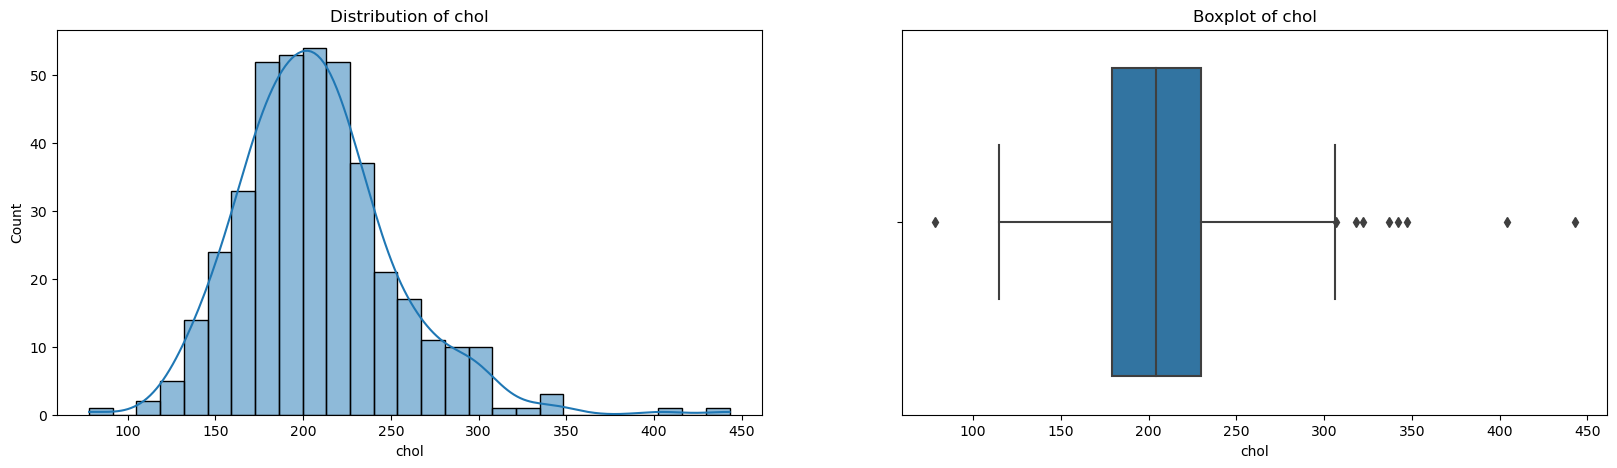

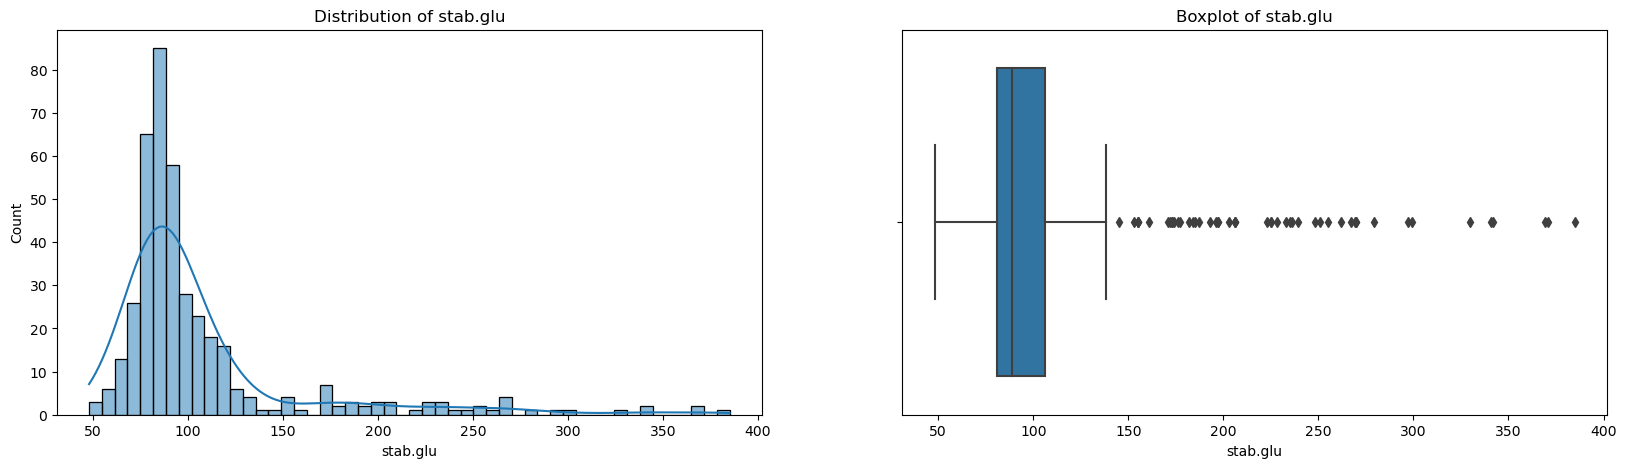

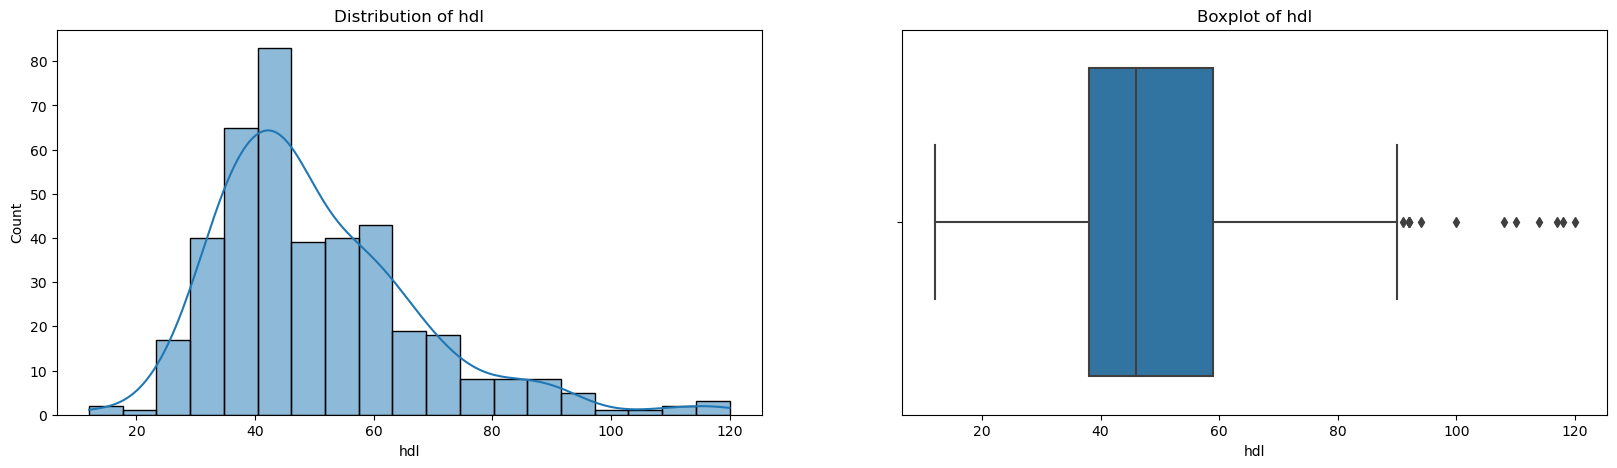

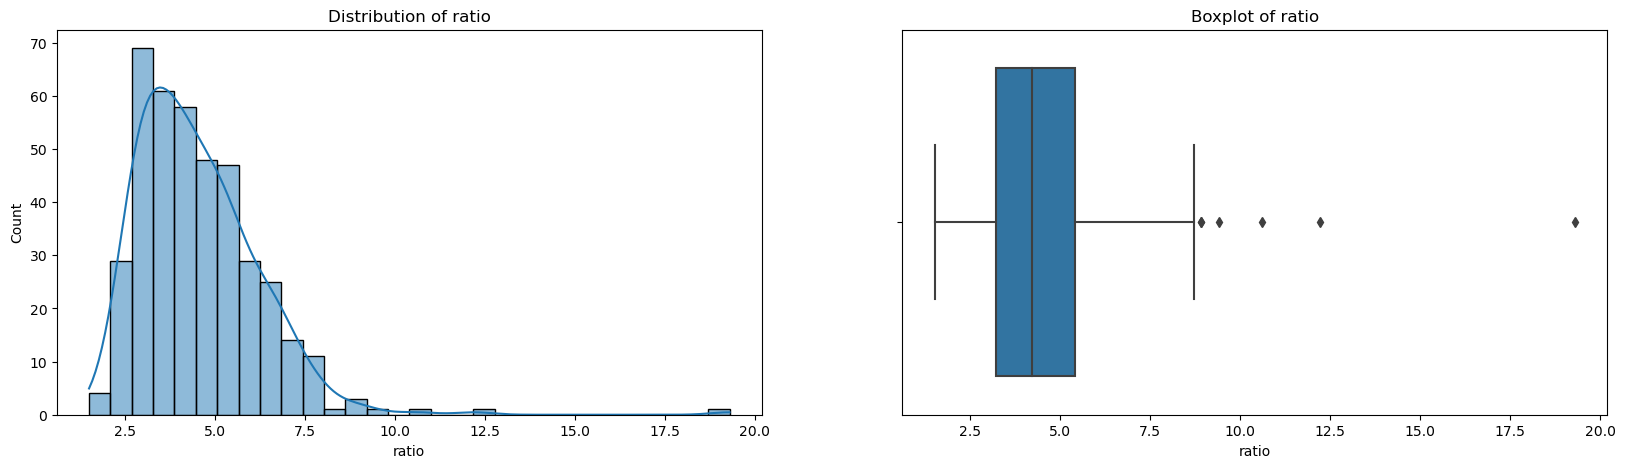

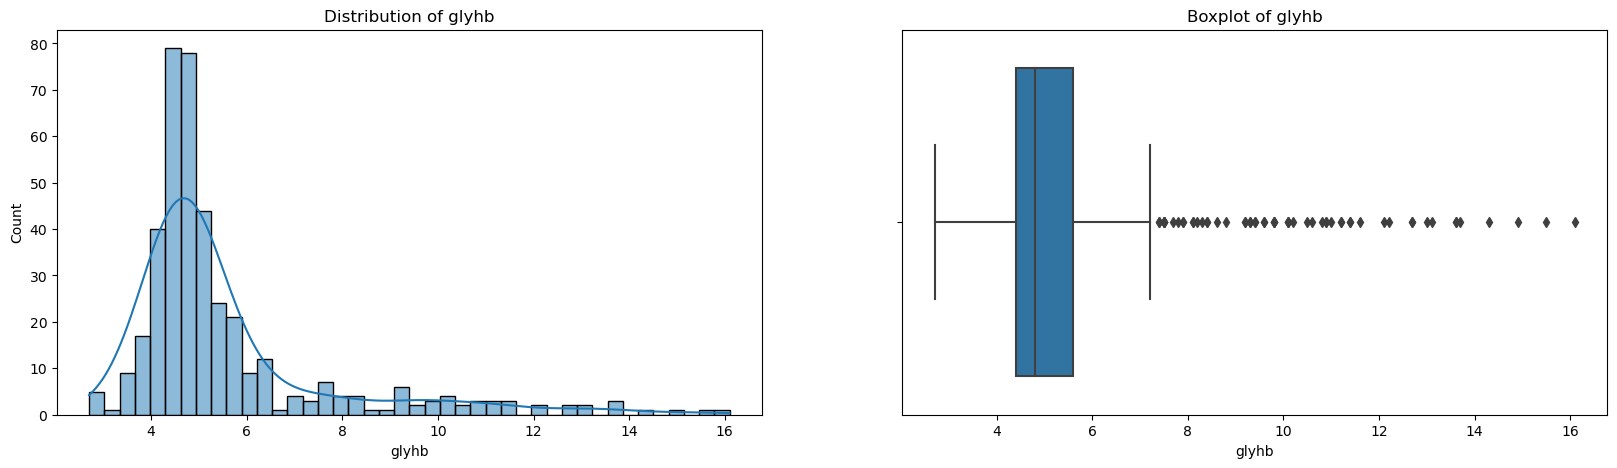

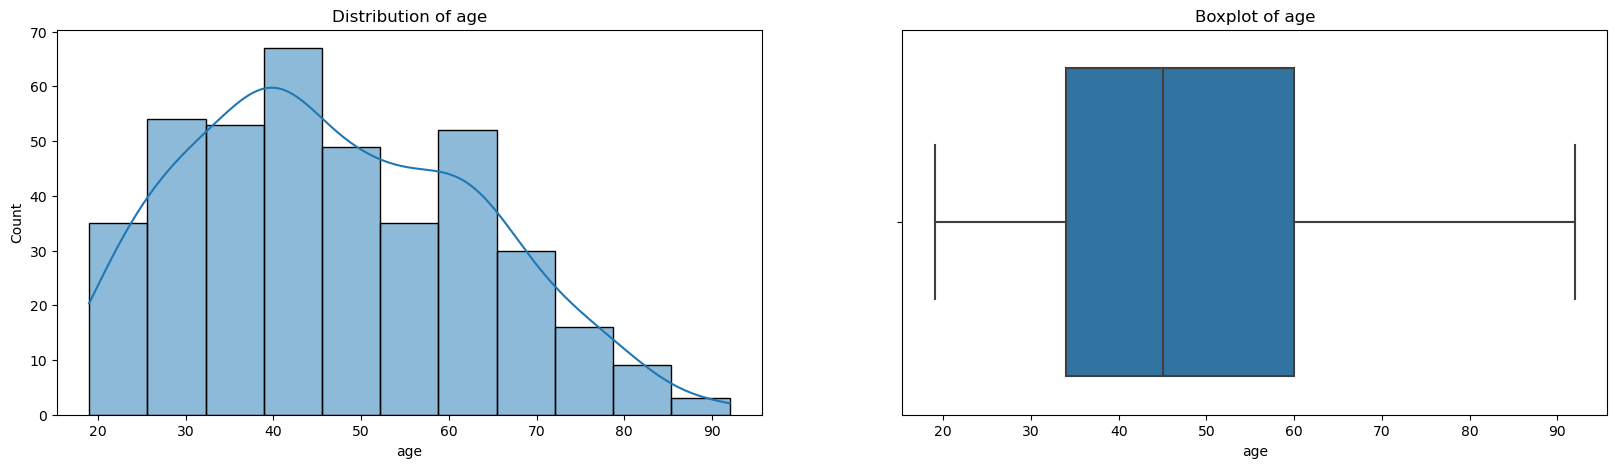

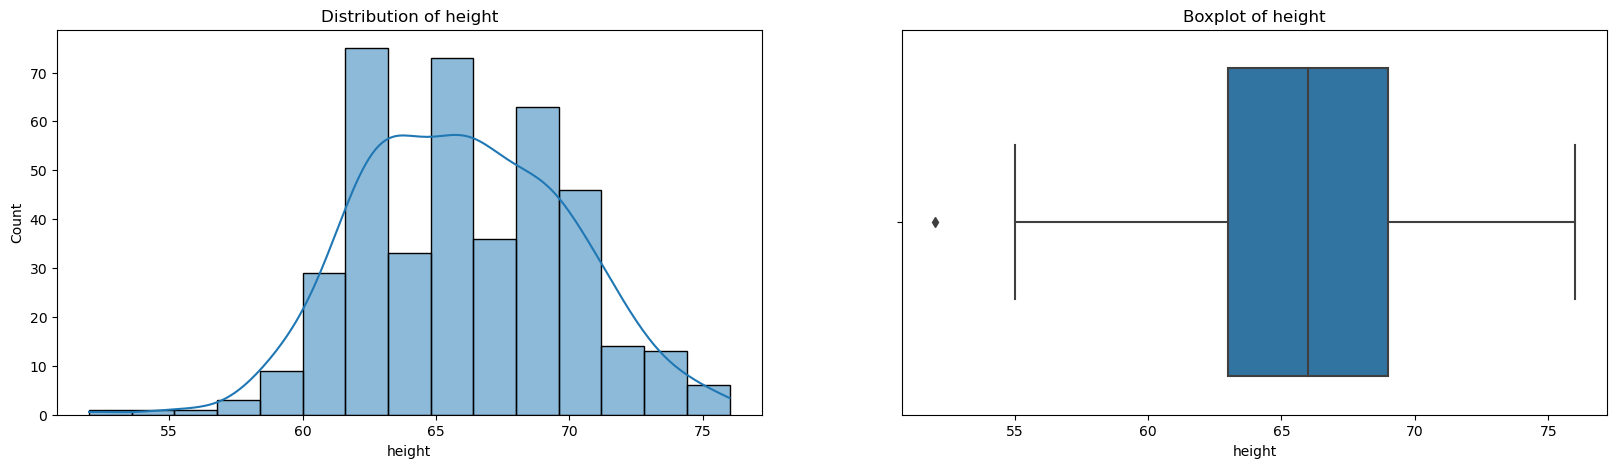

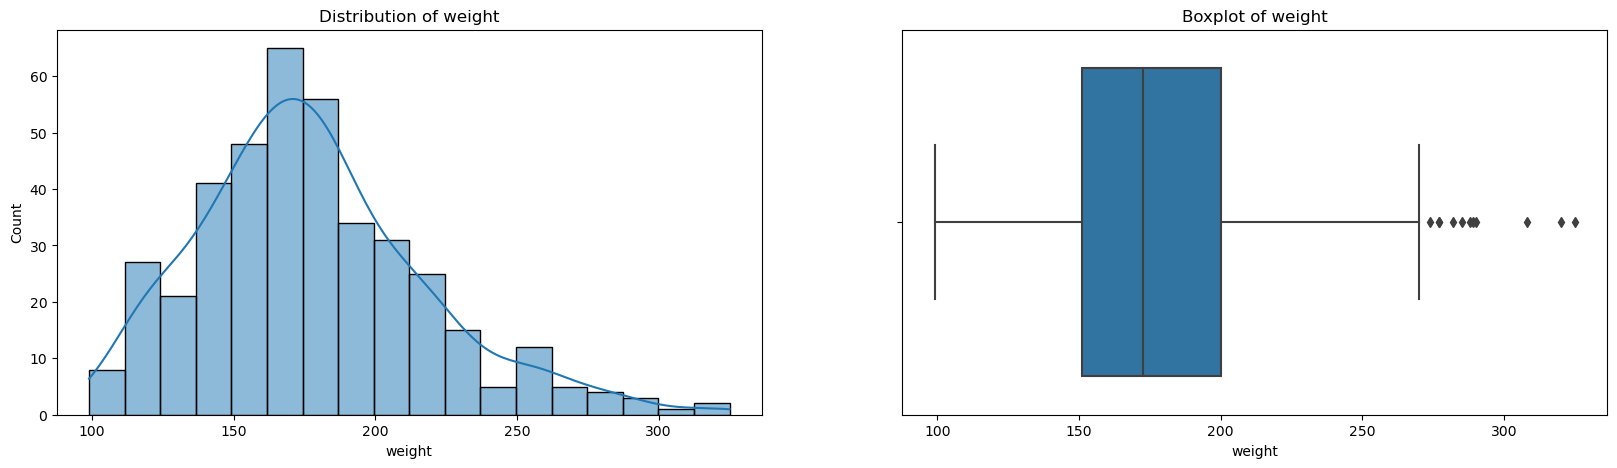

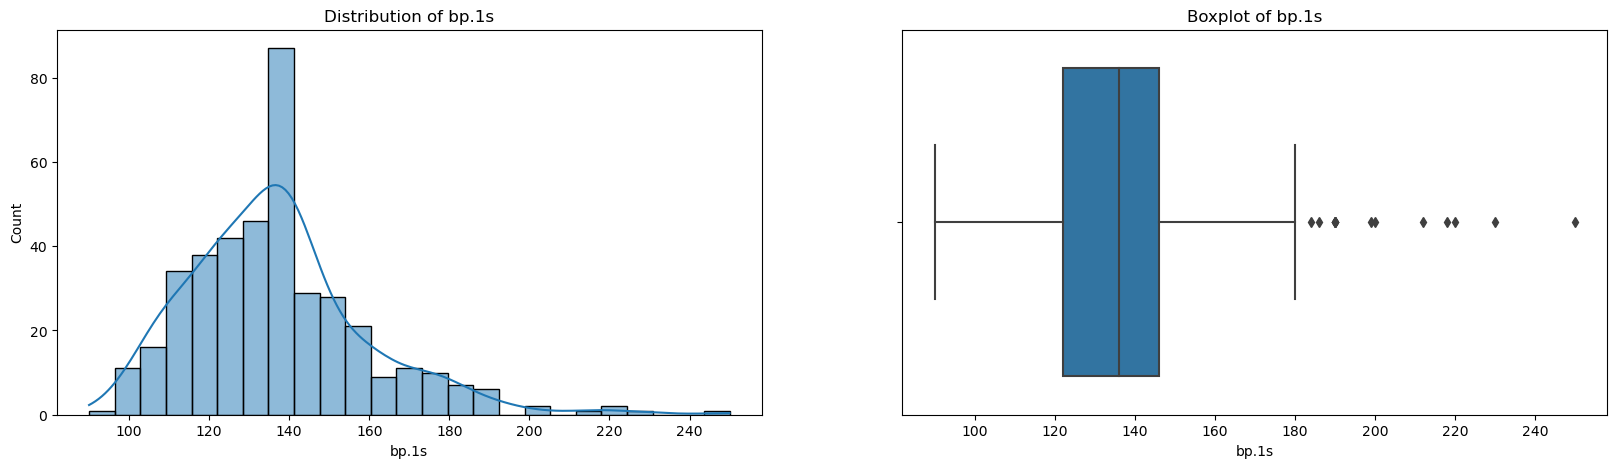

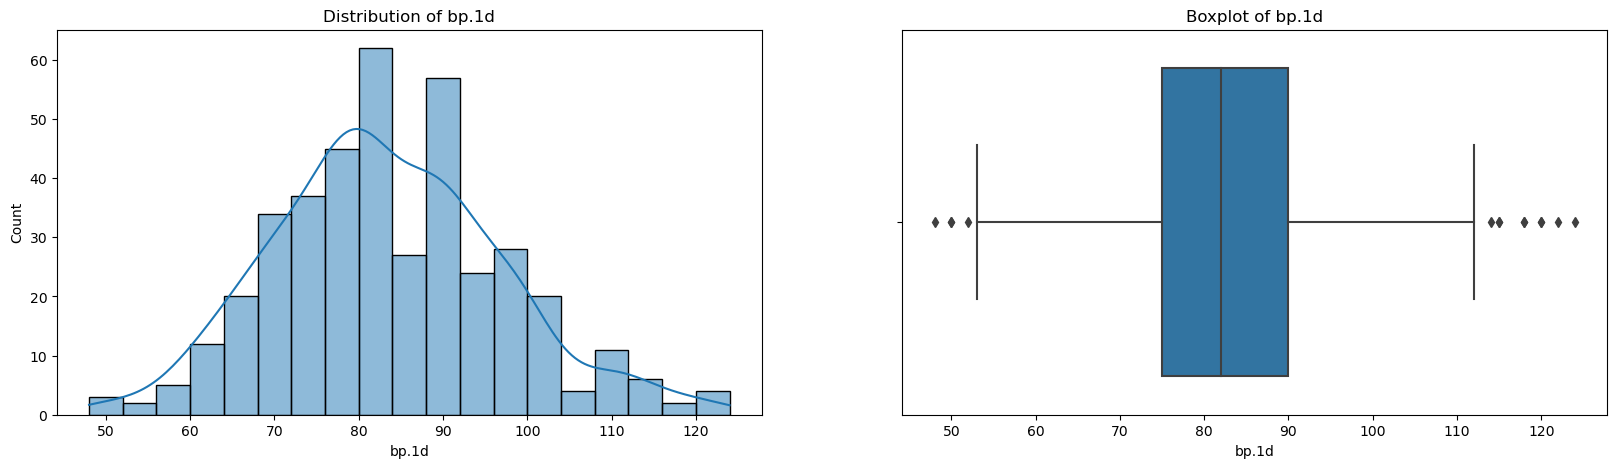

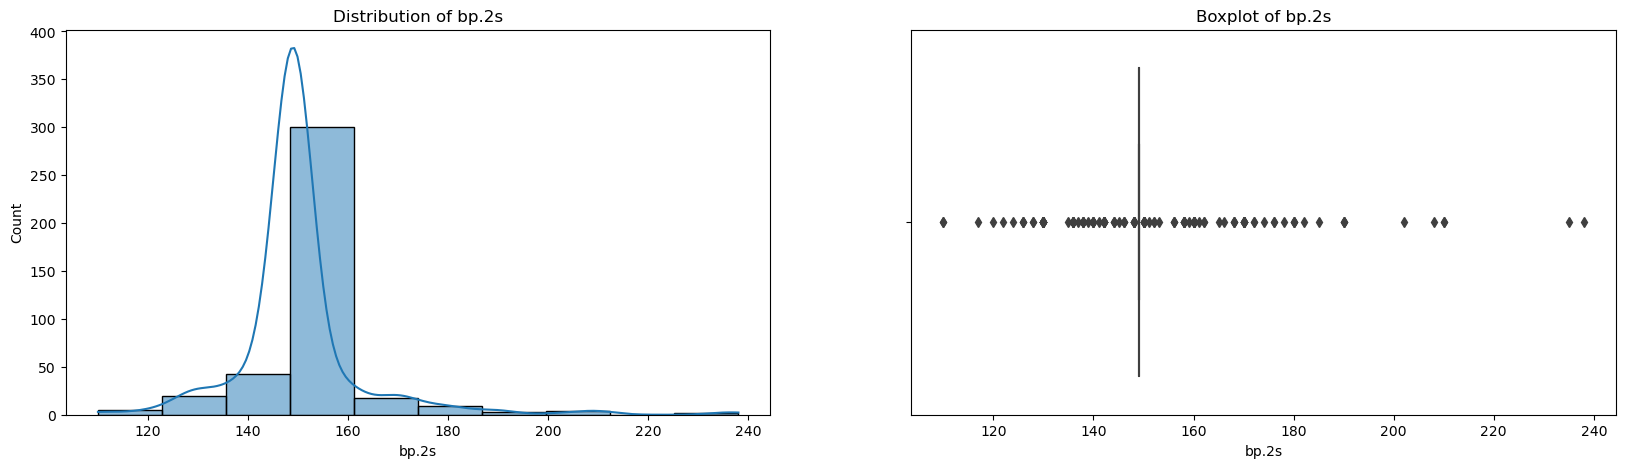

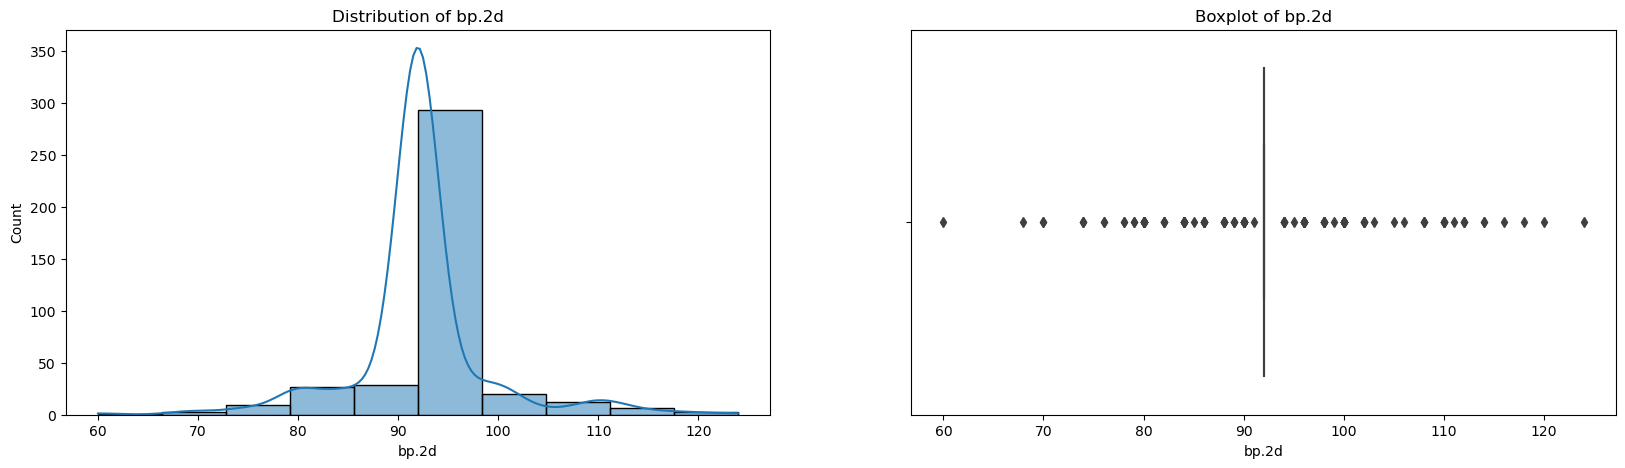

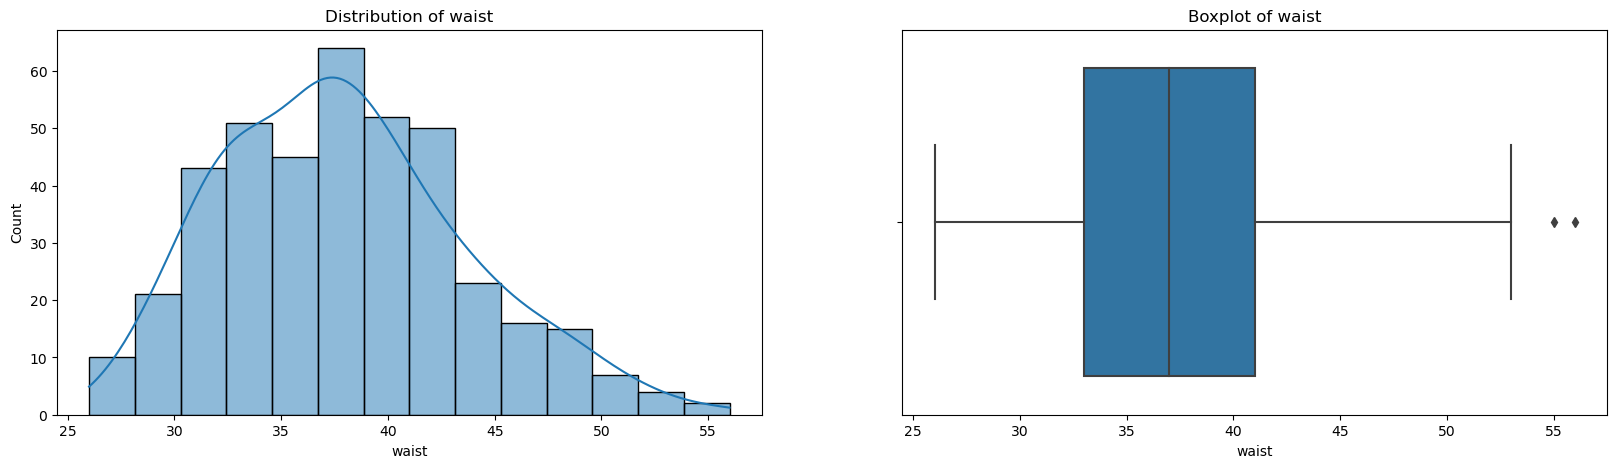

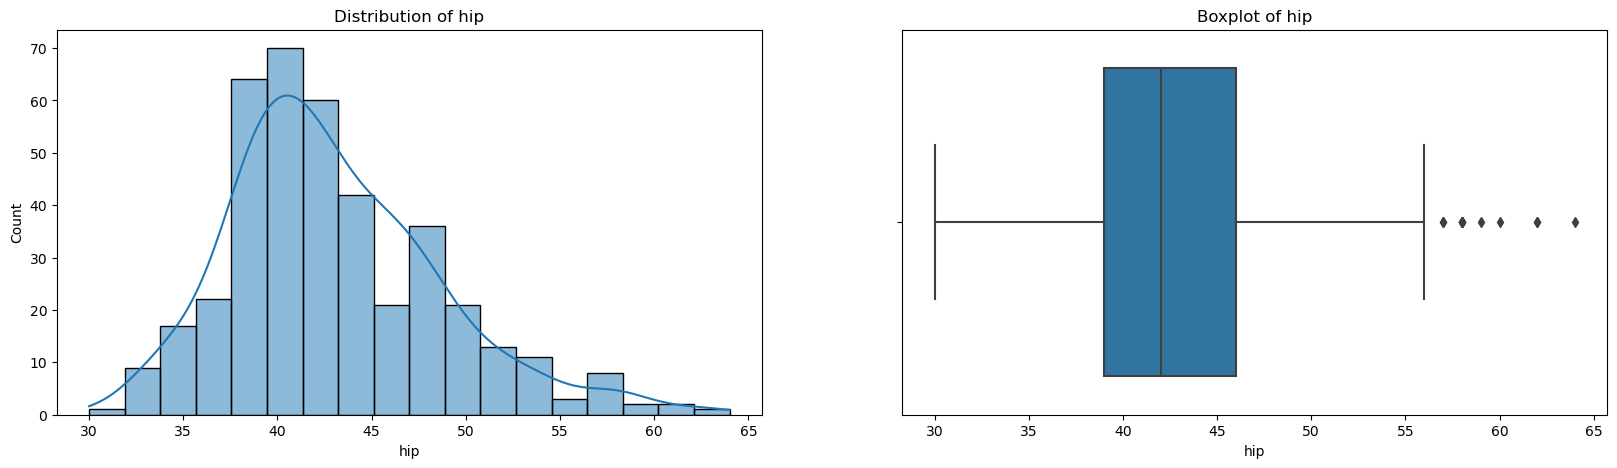

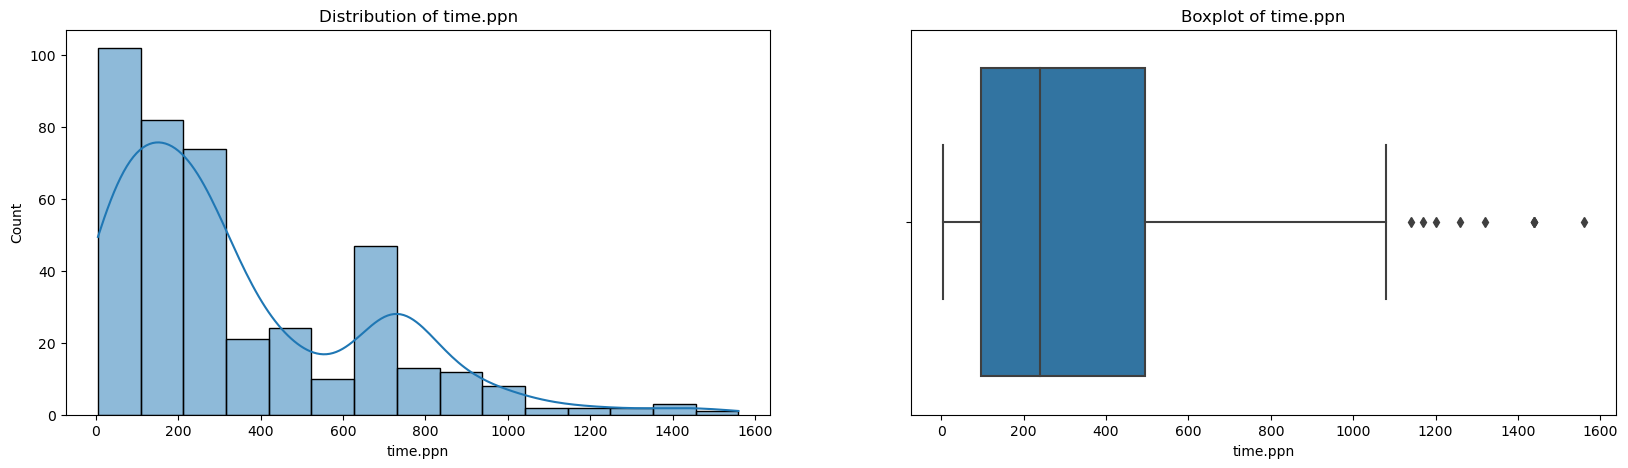

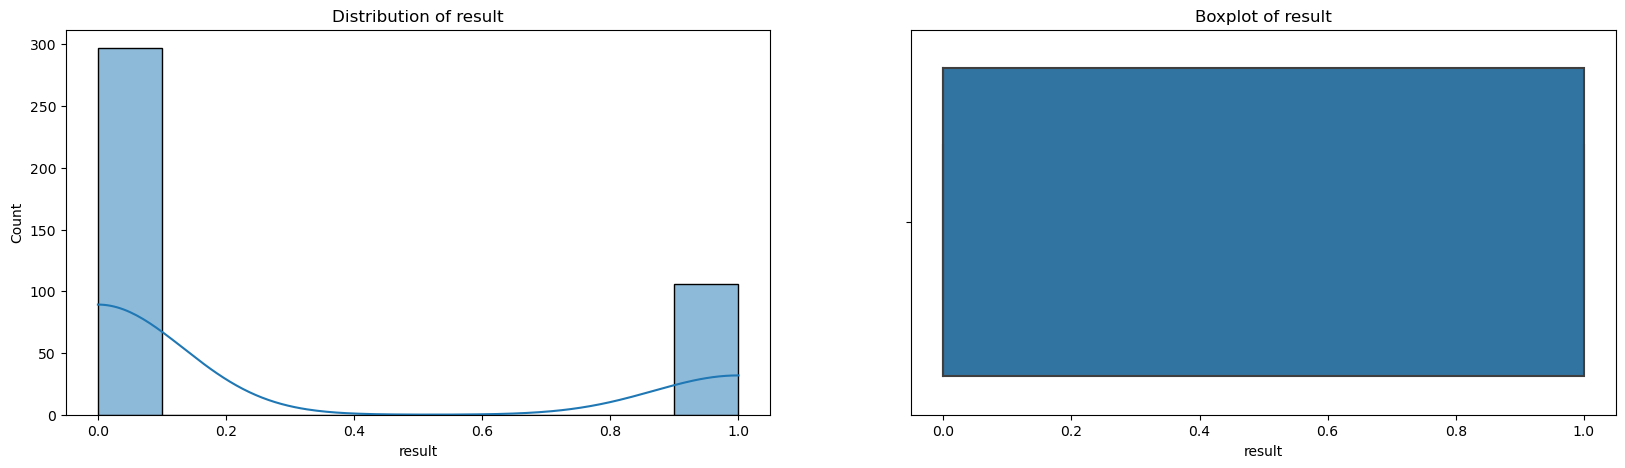

In [11]:
# Analyze distribution of key numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [13]:
# Identify skewness
skewness = df[numerical_cols].skew()
print("Skewness of numerical features:\n", skewness)

Skewness of numerical features:
 id          0.818845
chol        0.931816
stab.glu    2.766131
hdl         1.199732
ratio       2.216253
glyhb       2.299303
age         0.321855
height      0.028407
weight      0.727905
bp.1s       1.118723
bp.1d       0.277748
bp.2s       2.473525
bp.2d       0.463086
waist       0.474774
hip         0.808159
time.ppn    1.222988
result      1.080497
dtype: float64


In [15]:
# Identify outliers
for col in numerical_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers = np.where(z_scores > 3)
    print(f'Outliers in {col}: {len(outliers[0])}')

Outliers in id: 0
Outliers in chol: 4
Outliers in stab.glu: 13
Outliers in hdl: 6
Outliers in ratio: 3
Outliers in glyhb: 12
Outliers in age: 0
Outliers in height: 1
Outliers in weight: 3
Outliers in bp.1s: 5
Outliers in bp.1d: 1
Outliers in bp.2s: 11
Outliers in bp.2d: 10
Outliers in waist: 1
Outliers in hip: 4
Outliers in time.ppn: 5
Outliers in result: 0


In [17]:
# Count of Diabetic vs Non-Diabetic
diagnosis_counts = df['diagnosis'].value_counts()
print(diagnosis_counts)

Non-Diabetic    297
Diabetic         69
Pre-Diabetes     37
Name: diagnosis, dtype: int64


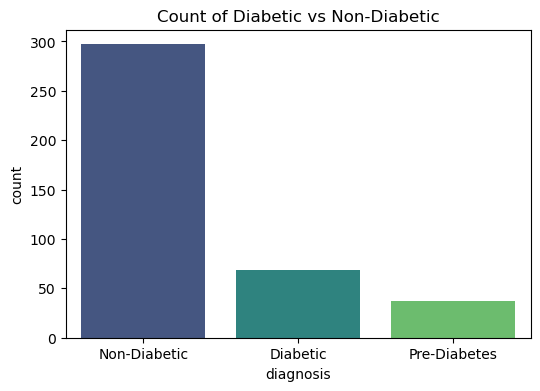

In [19]:
# Plot count of Diabetic vs Non-Diabetic
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df, palette='viridis')
plt.title('Count of Diabetic vs Non-Diabetic')
plt.show()

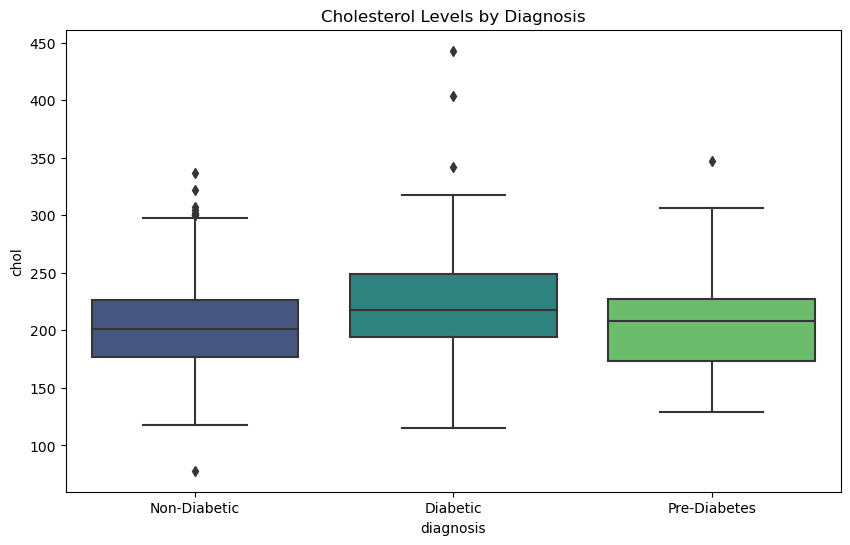

In [21]:
# Insights on cholesterol levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='chol', data=df, palette='viridis')
plt.title('Cholesterol Levels by Diagnosis')
plt.show()

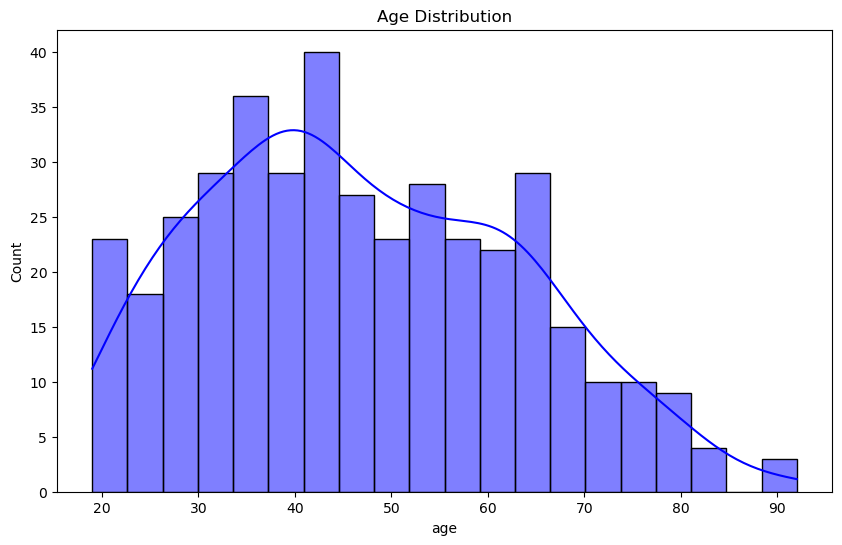

In [23]:
# Insights on age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

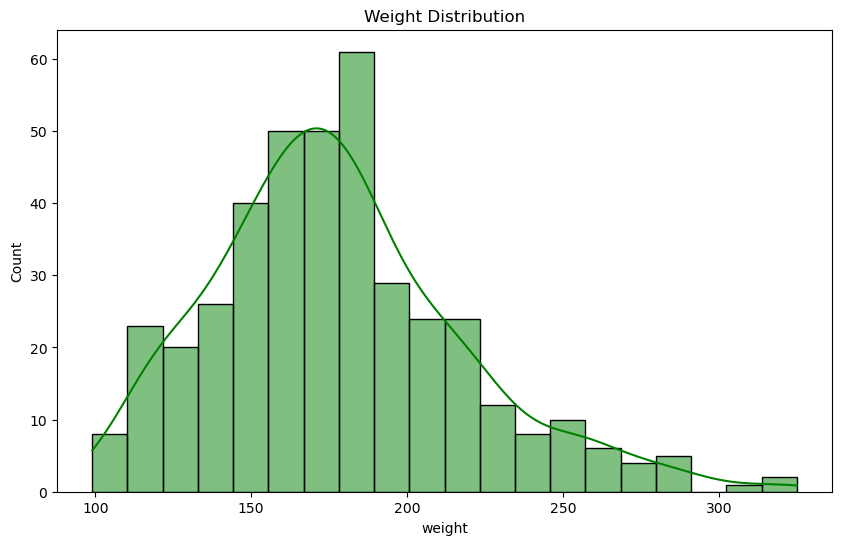

In [25]:
# Insights on weight distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['weight'], bins=20, kde=True, color='green')
plt.title('Weight Distribution')
plt.show()

In [27]:
# Average glyhb by diagnosis
avg_glyhb_by_diagnosis = df.groupby('diagnosis')['glyhb'].mean()
print(avg_glyhb_by_diagnosis)

diagnosis
Diabetic        9.695652
Non-Diabetic    4.565657
Pre-Diabetes    5.891892
Name: glyhb, dtype: float64


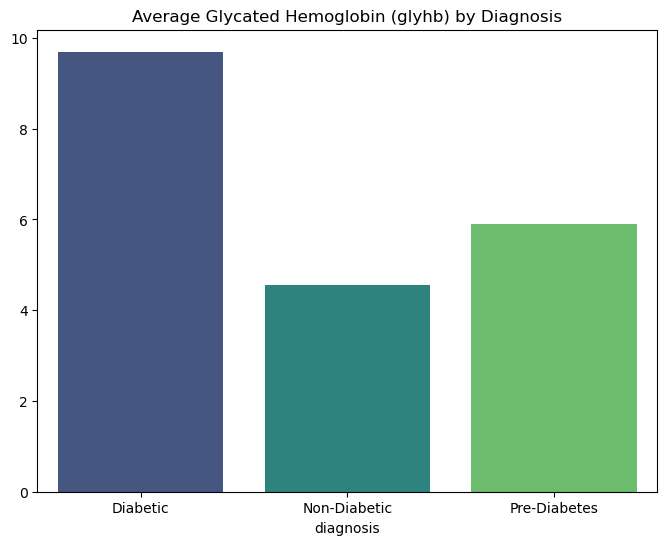

In [29]:
# Plot average glyhb by diagnosis
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_glyhb_by_diagnosis.index, y=avg_glyhb_by_diagnosis.values, palette='viridis')
plt.title('Average Glycated Hemoglobin (glyhb) by Diagnosis')
plt.show()